In [1]:
# nearest fixation dis and time per key pressing

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readPickle(filename):
    import pickle

    # reload a file to a variable
    with open(filename, 'rb') as file:
        a_dict1 =pickle.load(file)

    return a_dict1

In [3]:
def writePickle(filename,dictionary):
    import pickle
    # pickle a variable to a file
    file = open(filename, 'wb')
    pickle.dump(dictionary, file)
    file.close()

In [4]:
def rejectOutliers(dataX, dataY, dataKey):
    u = np.mean(dataY)
    s = np.std(dataY)
    print([u,s])
    dataX1 = []
    dataY1 = []
    dataKey1 = []
    
    rejected = []
    for i in range(len(dataY)):
        if (u - 2 * s) < dataY[i] < (u + 2 * s):
            dataX1.append(dataX[i])
            dataY1.append(dataY[i])
            dataKey1.append(dataKey[i])
        else:
            rejected.append(dataY[i])   
    if len(dataY)!=len(dataY1):
        print('outlier rejected:')
        print(rejected)
    return [dataX1,dataY1,dataKey1]

In [5]:
dictFix = readPickle('./pkl/eyeMovementData.pkl')
#dictFin = readPickle('./pkl/fingerMovementData.pkl')

In [6]:
def KeyToXY(key):
    keys_ = ['q','w','e','r','t','y','u','i','o','p','å','a','s','d','f','g','h','j','k','l','ö','ä','z'
            ,'x','c','v','b','n','m','<',' ','enter']
    xs = [566, 697, 828, 959, 1090, 1221, 1352, 1483, 1614, 1745, 1876, 566, 697, 828, 959
         , 1090, 1221, 1352, 1483, 1614, 1745, 1876, 828, 959, 1090, 1221, 1352, 1483, 1614
         , 1810, 1193, 1737]
    ys = [1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 2185, 2185
         , 2185, 2185, 2185, 2185, 2185, 2185, 2185, 2185, 2185, 2415, 2415, 2415, 2415
         , 2415, 2415, 2415, 2415, 2645, 2645]

    if key not in keys_:
        return []
    else:
        p = keys_.index(key)
        return [xs[p], ys[p]]

In [7]:
dictFix = readPickle('./pkl/eyeMovementData.pkl')
print(dictFix['101']['1']['20'].keys())

dict_keys(['systemtime', 'trialtime', 'key', 'touchx', 'touchy', 'x', 'y', 'xf', 'yf', 'fixnum', 'fixdur', 't', 'IKI', 'errorMessage'])


In [21]:
#计算点击key之前之后最近的fixation与key之间的距离，以及出现时间

block = '1'

nearestDisList = []
nearestDisTimeList = []
keyList = []

for subject in dictFix.keys():
    for sentence in dictFix[subject][block].keys():
        for i in range(len(dictFix[subject][block][sentence]['key'])):
            if i!=0 and i!=(len(dictFix[subject][block][sentence]['key'])-1):
                key = dictFix[subject][block][sentence]['key'][i]
                if key not in [' ','<','enter']:
                    keyX, KeyY = KeyToXY(key)
                    nearestDis = 100000
                    if len(dictFix[subject][block][sentence]['x'])!=0:
                        
                        for j1 in range(len(dictFix[subject][block][sentence]['x'][i])):
                            fixX = dictFix[subject][block][sentence]['x'][i][j1]
                            fixY = dictFix[subject][block][sentence]['y'][i][j1]
                            dis = np.sqrt((fixX-keyX)*(fixX-keyX)+(fixY-KeyY)*(fixY-KeyY))
                            if dis<nearestDis:
                                nearestDis = dis
                                nearestDisTime =  dictFix[subject][block][sentence]['t'][i][j1] - dictFix[subject][block][sentence]['trialtime'][i]
                        for j2 in range(len(dictFix[subject][block][sentence]['x'][i+1])):
                            fixX = dictFix[subject][block][sentence]['x'][i+1][j2]
                            fixY = dictFix[subject][block][sentence]['y'][i+1][j2]
                            dis = np.sqrt((fixX-keyX)*(fixX-keyX)+(fixY-KeyY)*(fixY-KeyY))
                            if dis<nearestDis:
                                nearestDis = dis
                                nearestDisTime = dictFix[subject][block][sentence]['t'][i+1][j2] - dictFix[subject][block][sentence]['trialtime'][i]
                    if nearestDis!=100000:
                        nearestDisList.append(nearestDis)
                        nearestDisTimeList.append(nearestDisTime)
                        keyList.append(key)                    
                    

In [22]:
#通过nearestDisTimeList去掉 outlier和其对应的nearestDisList，keyList元素
nearestDisList1,nearestDisTimeList1,keyList1 = rejectOutliers(nearestDisList,nearestDisTimeList,keyList)

[-14.978910007833925, 276.76896726447774]
outlier rejected:
[986.0, 677.6670000000004, -1243.0, 712.6669999999999, -790.0, -806.3330000000005, 700.3330000000001, 622.3329999999996, 834.6670000000004, 583.0, 682.0, 559.3330000000001, 575.0, 622.0, -808.6669999999999, 614.3329999999996, 915.0, 601.0, -847.6669999999999, -643.0, -624.0, 803.6669999999995, -652.0, -3313.0, -624.6669999999999, 599.3330000000001, -7769.0, 598.3330000000001, 637.6670000000004, 578.0, 646.3329999999996, -1132.0, 863.3330000000005, 1006.0, 716.6669999999995, 550.0, 819.3330000000001, 606.0, -1819.333, -578.6669999999999, -737.0, -699.6669999999999, -746.0, 784.6670000000004, 596.3329999999996, -592.6670000000004, -617.6670000000004, 729.6670000000004, 550.6670000000004, 15532.333, -2947.0, 571.3329999999996, 602.0, 548.3330000000005, -1348.667, 613.6669999999995, 1838.0, 700.3330000000005, 608.6670000000004, 581.0, 583.3330000000005, 679.6670000000004, 567.6670000000004, 659.3330000000005, 584.6670000000004, 57

In [16]:
def drawTimeHistogram(timeList,title):
    plt.hist(timeList, bins='auto')  # arguments are passed to np.histogram
    plt.title(title)
    plt.savefig(title+".png")
    plt.show()

Histogram without outlier for time difference:


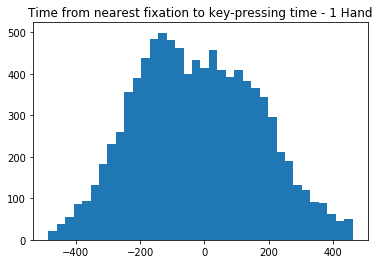

In [17]:
#print('Histogram with outlier for time difference:')
#drawTimeHistogram(nearestDisTimeList,'Time difference from nearest fixation to the key-pressing time')
print('Histogram without outlier for time difference:')
drawTimeHistogram(nearestDisTimeList1,'Time from nearest fixation to key-pressing time - 2 Hand')

In [23]:
#画最近fixation平均距离key中心的距离的heatmap

allkeyList = ['q','w','e','r','t','y','u','i','o','p','å','a','s','d','f','g','h','j','k','l','ö','ä','z'
            ,'x','c','v','b','n','m','<',' ']
posList = []
#每次点击key的最近fixation都存进去
disListforKeys = {}
#对于每个key，所有最近fixation的mean
dislist = []

for i in range(len(allkeyList)):
    key = allkeyList[i]
    posList.append(KeyToXY(key))
    disListforKeys[key] = []
    for j in range(len(nearestDisList)):
        #nearestDisList[j]=100000是一个默认值，如果当前位置没有计算出数据，就填100000
        #所以在实际计算的过程中需要跳过100000的情况
        if keyList[j]==key and nearestDisList[j]!=100000:
            #最近fixation的距离
            disListforKeys[key].append(nearestDisList[j])
for item in keyList:
    #如果当前dis的数据量大于30，则画进图里
    if len(disListforKeys[item])>30:
        dislist.append(np.mean(disListforKeys[item]))
    else:
        dislist.append(100000)

#计算每个mean dis占最大mean dis的比例（画heatmap的时候确定颜色用）
maxdis = 0
for dis in dislist:
    if dis!=100000 and dis>maxdis:
        maxdis = dis
disPercentage = []
for item in dislist:
    disPercentage.append(item/maxdis)

In [24]:
# draw heatmap for nearest fixation distance

def drawFixRate(title, posList, keyList, rateList, dislist):
    
    from PIL import Image, ImageDraw, ImageFont
    import matplotlib.pyplot as plt

    image = Image.open('back.png')
    draw = ImageDraw.Draw(image)
    for index in range(len(keyList)):
        if dislist[index]!=100000:
            if keyList[index]!=' ' and keyList[index]!='<':
                #key width=131px height=230px
                x1 = int(posList[index][0]-(131/2))
                y1 = int(posList[index][1]-(230/2))
                x2 = int(posList[index][0]+(131/2))
                y2 = int(posList[index][1]+(230/2))

                draw.rectangle((x1,y1,x2,y2), fill=(int((1-rateList[index])*255), 0, 0), outline=None)
                font1 = ImageFont.truetype("arial.ttf", 80)
                font2 = ImageFont.truetype("arial.ttf", 40)
                draw.text((x1+45,y1+50), keyList[index],  fill=(255, 255, 255), font=font1)
                draw.text((x1+35,y1+150), str(int(dislist[index])),  fill=(255, 255, 255), font=font2)

            elif keyList[index]=='<':
                #key width=262px height=230px
                x1 = int(posList[index][0]-(262/2))
                y1 = int(posList[index][1]-(230/2))
                x2 = int(posList[index][0]+(262/2))
                y2 = int(posList[index][1]+(230/2))

                draw.rectangle((x1,y1,x2,y2), fill=(int((1-rateList[index])*255), 0, 0), outline=None)
                font1 = ImageFont.truetype("arial.ttf", 80)
                font2 = ImageFont.truetype("arial.ttf", 40)
                draw.text((x1+100,y1+50), keyList[index],  fill=(255, 255, 255), font=font1)
                draw.text((x1+95,y1+150), str(int(dislist[index])),  fill=(255, 255, 255), font=font2)

            elif keyList[index]==' ':
                #key width=655px height=230px
                x1 = int(posList[index][0]-(655/2))
                y1 = int(posList[index][1]-(230/2))
                x2 = int(posList[index][0]+(655/2))
                y2 = int(posList[index][1]+(230/2))

                draw.rectangle((x1,y1,x2,y2), fill=(int((1-rateList[index])*255), 0, 0), outline=None)
                font1 = ImageFont.truetype("arial.ttf", 80)
                font2 = ImageFont.truetype("arial.ttf", 40)
                draw.text((x1+350,y1+50), keyList[index],  fill=(255, 255, 255), font=font1)
                draw.text((x1+310,y1+150), str(int(dislist[index])),  fill=(255, 255, 255), font=font2)
            
    image.save(title+ " - 2 Hand.png")
    #image.show()

In [25]:
drawFixRate('Nearest fixation distance', posList, allkeyList, disPercentage,dislist)